In [4]:
import croparray as ca

In [8]:
mycas = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc", as_object=True)

In [9]:
ca1 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc", as_object=True)

In [10]:
ca2 = ca.open_croparray(
    "/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/WT_XBP1/20251217_FCS/WT/DataAnalysis/Cell01.nc", as_object=True)

In [12]:
ca3 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/SA_XBP1/FCS/20251125/DataAnalysis/Cell01.nc", as_object=True)

In [ ]:
cas = ca.concat(cas=[ca1,ca2,ca3], dim="Exp", labels =["no pause","wt-XBP1", "SA-XBP1"],join="outer");

In [13]:
ca1.ds = ca1.ds.assign_coords(dt=7)
ca2.ds = ca2.ds.assign_coords(dt=7)
ca3.ds = ca3.ds.assign_coords(dt=7)

In [14]:
ca1.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.45, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [15]:
ca2.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.45, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [16]:
ca3.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.45, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [17]:
ca1.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [18]:
ca2.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [19]:
ca3.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [20]:
ca1.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [21]:
ca2.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [39]:
import pandas as pd
df1 = ca1.df.variables_to_df(var_names=["ch0_mask_manual__skeleton_longest_path_px","ch0_mask_manual__major_axis_length_px"]);
df1["Exp"] = "No pause"
df2 = ca2.df.variables_to_df(var_names=["ch0_mask_manual__skeleton_longest_path_px","ch0_mask_manual__major_axis_length_px"]);
df2["Exp"] = "wt-XBP1"

df3 = ca3.df.variables_to_df(var_names=["ch0_mask_manual__skeleton_longest_path_px","ch0_mask_manual__major_axis_length_px"]);
df3["Exp"] = "SA-XBP1"

df = pd.concat([df1,df2,df3])
df

,fov,n,t,dt,ch0_mask_manual__skeleton_longest_path_px,ch0_mask_manual__major_axis_length_px,Exp
0,0,0,0,7,1.000000,3.829708,No pause
1,0,0,1,7,2.000000,5.093919,No pause
2,0,0,2,7,5.242641,6.038490,No pause
3,0,0,3,7,0.000000,3.023716,No pause
4,0,0,4,7,1.000000,3.781743,No pause
...,...,...,...,...,...,...,...
76995,0,69,1095,7,NaN,NaN,SA-XBP1
76996,0,69,1096,7,NaN,NaN,SA-XBP1
76997,0,69,1097,7,NaN,NaN,SA-XBP1
76998,0,69,1098,7,NaN,NaN,SA-XBP1


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

metric = "ch0_mask_manual__major_axis_length_px"

df_plot = df[["Exp", metric]].dropna()


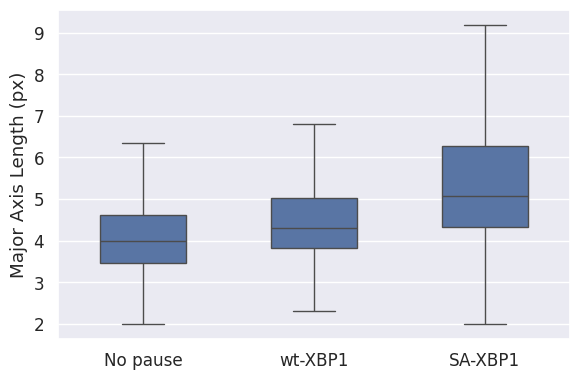

In [65]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df_plot,
    x="Exp",
    y=metric,
    showfliers=False,
    width=0.5,
)

plt.ylabel("Major Axis Length (px)")
plt.xlabel("")
plt.tight_layout()
plt.show()


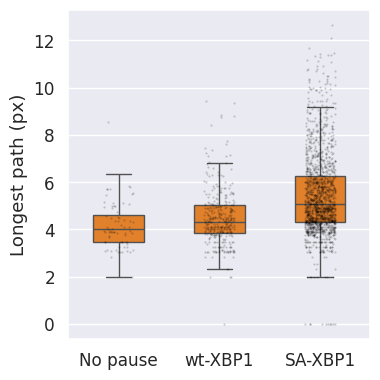

In [68]:
df_pts = df_plot.sample(2000, random_state=0)

plt.figure(figsize=(4, 4))

sns.boxplot(
    data=df_plot,
    x="Exp",
    y=metric,
    showfliers=False,
    width=0.5,
    color="tab:orange",
)

sns.stripplot(
    data=df_pts,
    x="Exp",
    y=metric,
    color="black",
    size=1.5,
    alpha=0.2,
    jitter=0.15,
)

plt.ylabel("Longest path (px)")
plt.xlabel("")
plt.tight_layout()
plt.show()


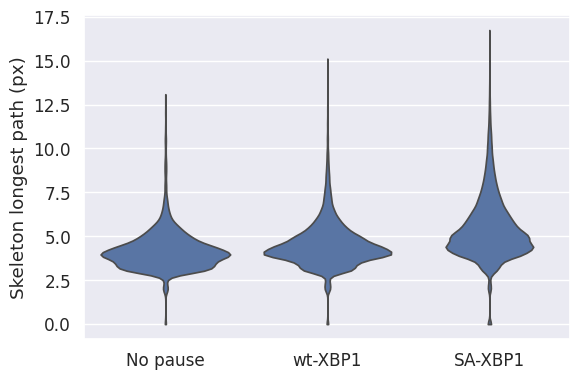

In [57]:
plt.figure(figsize=(6, 4))

sns.violinplot(
    data=df_plot,
    x="Exp",
    y=metric,
    inner=None,      # no inner box, cleaner
    cut=0,           # do not extend beyond data range
)

# sns.stripplot(
#     data=df_plot,
#     x="Exp",
#     y=metric,
#     color="black",
#     alpha=0.3,
#     size=2,
#     jitter=0.25,
# )

plt.ylabel("Skeleton longest path (px)")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

metric = "ch0_mask_manual__skeleton_longest_path_px"

df_plot = df[["Exp", metric]].dropna()


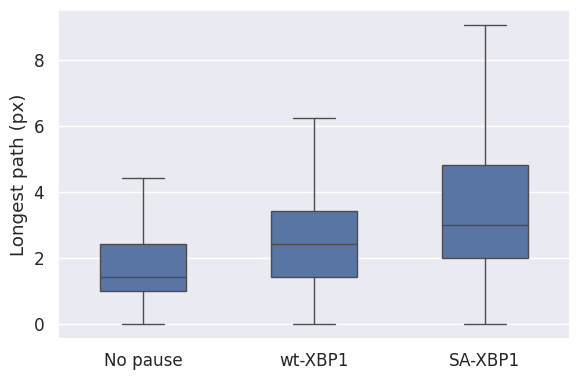

In [61]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df_plot,
    x="Exp",
    y=metric,
    showfliers=False,
    width=0.5,
)

plt.ylabel("Longest path (px)")
plt.xlabel("")
plt.tight_layout()
plt.show()


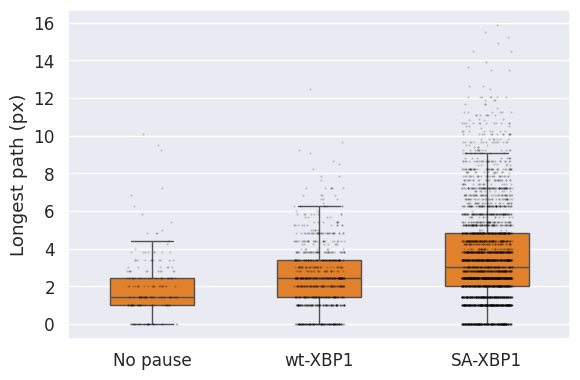

In [62]:
df_pts = df_plot.sample(5000, random_state=0)

plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df_plot,
    x="Exp",
    y=metric,
    showfliers=False,
    width=0.5,
    color="tab:orange",
)

sns.stripplot(
    data=df_pts,
    x="Exp",
    y=metric,
    color="black",
    size=1.5,
    alpha=0.2,
    jitter=0.15,
)

plt.ylabel("Longest path (px)")
plt.xlabel("")
plt.tight_layout()
plt.show()


<Axes: xlabel='Exp', ylabel='ch0_mask_manual__skeleton_longest_path_px'>

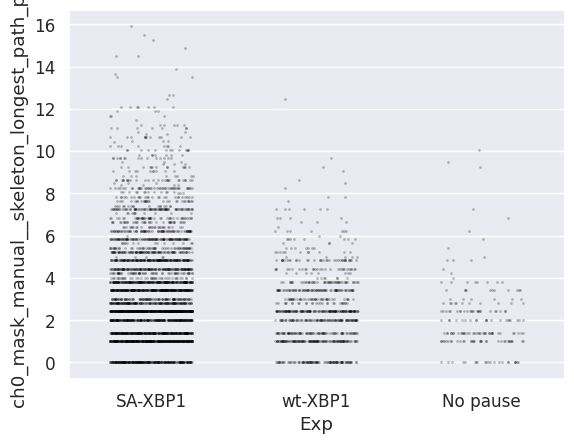

In [48]:
df_points = df_plot.sample(5000, random_state=0)

sns.stripplot(
    data=df_points,
    x="Exp",
    y=metric,
    color="black",
    alpha=0.25,
    size=2,
    jitter=0.25,
)


In [41]:
ca3.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [33]:
ecc1 = ca1.ds["ch0_mask_manual__major_axis_length_px"]
{"mean":   ecc1.mean().item(),"median": ecc1.median().item(),"std": ecc1.std().item(),}

{'mean': 4.192541466546745, 'median': 4.0, 'std': 1.1065566936758124}

In [24]:
ecc2 = ca2.ds["ch0_mask_manual__skeleton_longest_path_px"]
{"mean":   ecc2.mean().item(), "median": ecc2.median().item(),"std":    ecc2.std().item(),}

{'mean': 2.6245149744739975,
 'median': 2.414213562373095,
 'std': 1.7878422255112192}

In [25]:
ecc3 = ca3.ds["ch0_mask_manual__skeleton_longest_path_px"]
{"mean":   ecc3.mean().item(),"median": ecc3.median().item(),"std":    ecc3.std().item(),}

{'mean': 3.5315227418099298, 'median': 3.0, 'std': 2.4669493237492954}

In [26]:
ta1 = ca.crop_array_tools.track_array(ca1, as_object=True)
ta2 = ca.crop_array_tools.track_array(ca2, as_object=True)
ta3 = ca.crop_array_tools.track_array(ca3, as_object=True)

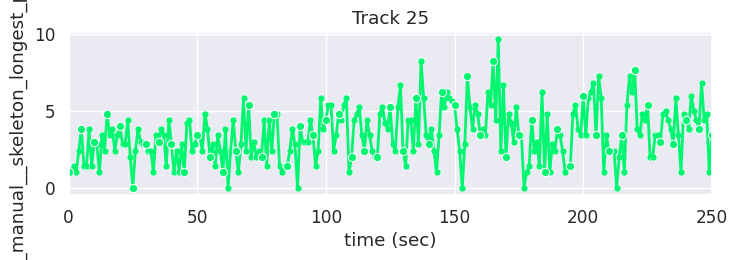

In [29]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__skeleton_longest_path_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1))

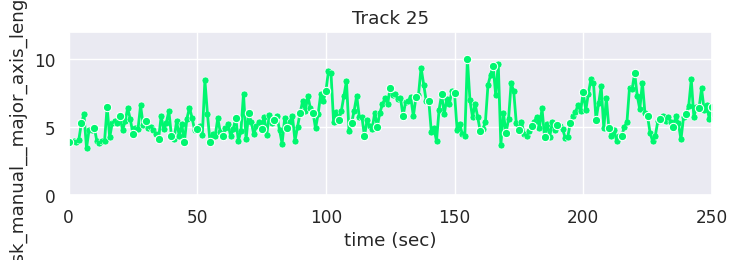

In [30]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

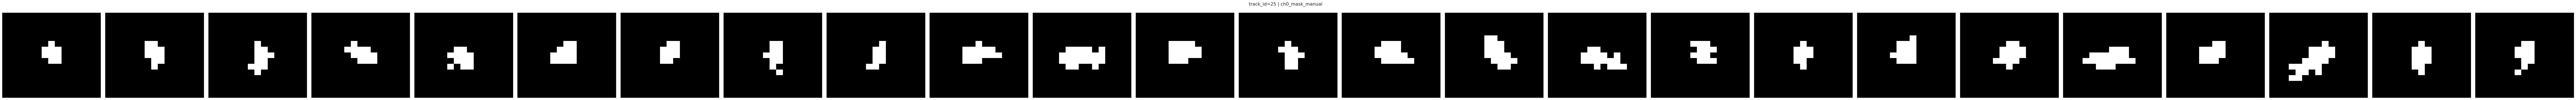

In [54]:
ta2.tplot.plot_trackarray_crops(layer="ch0_mask_manual", track_id=[25], t=(0, 250, 10));

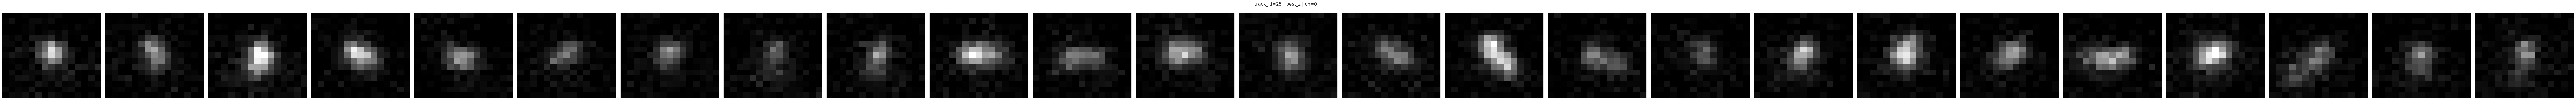

In [55]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[25], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

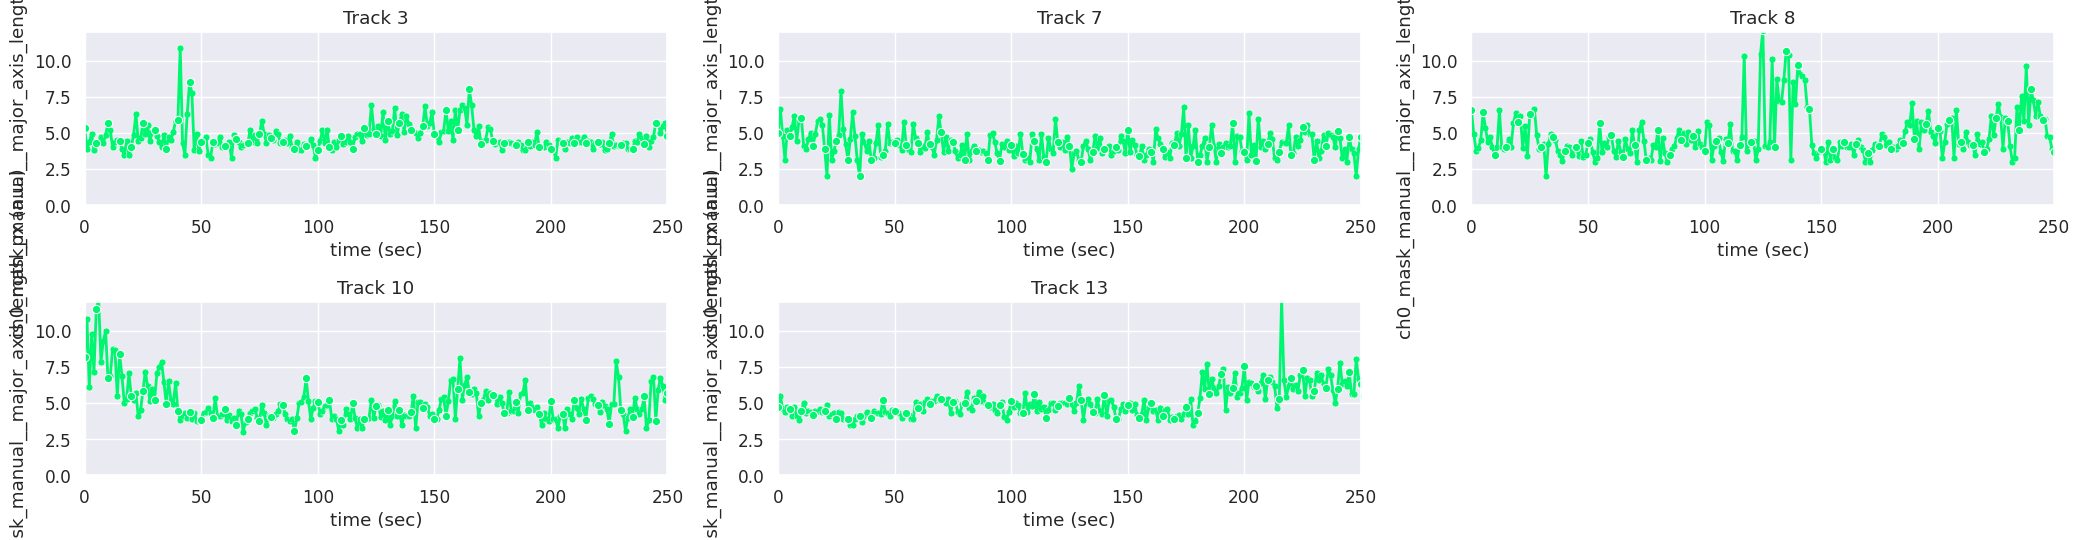

In [108]:
ta3.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[3,7,8,10,13],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

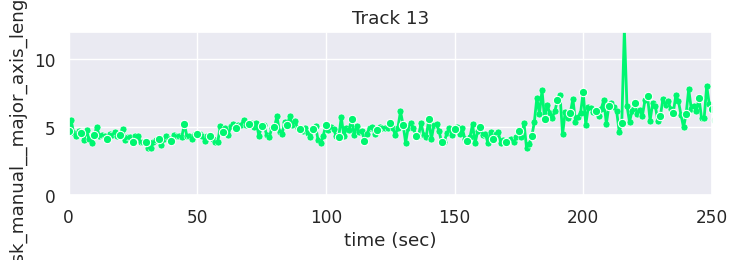

In [112]:
ta3.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[13],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

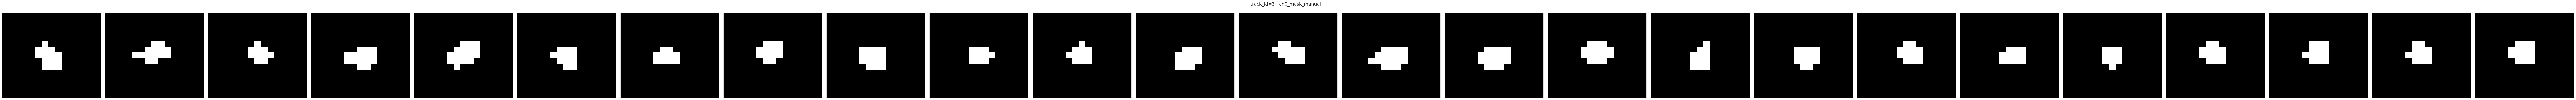

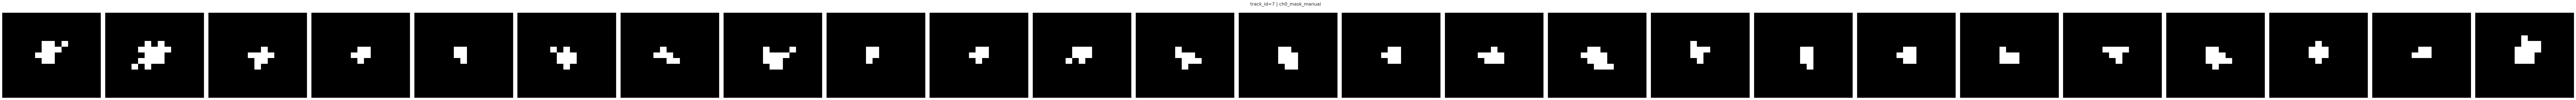

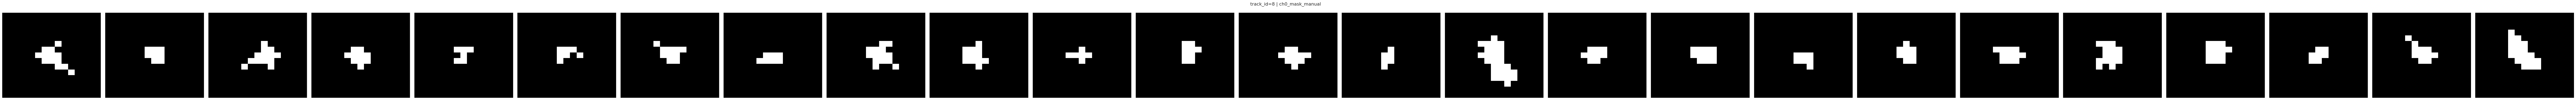

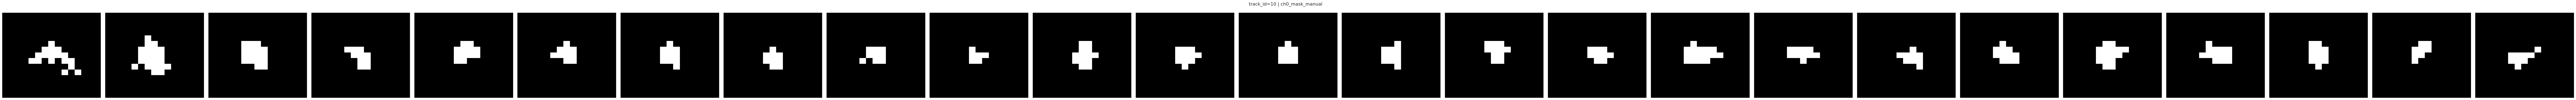

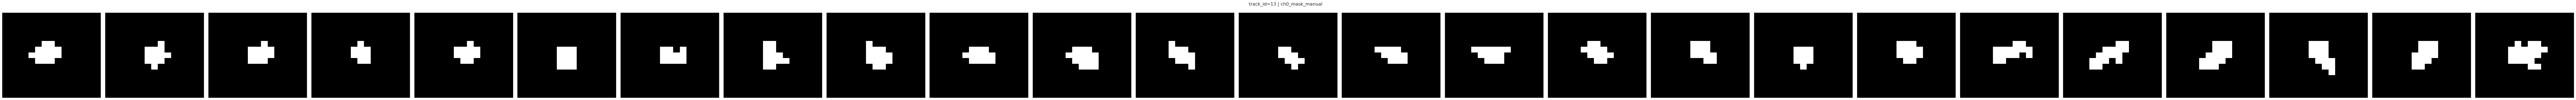

In [57]:
ta3.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

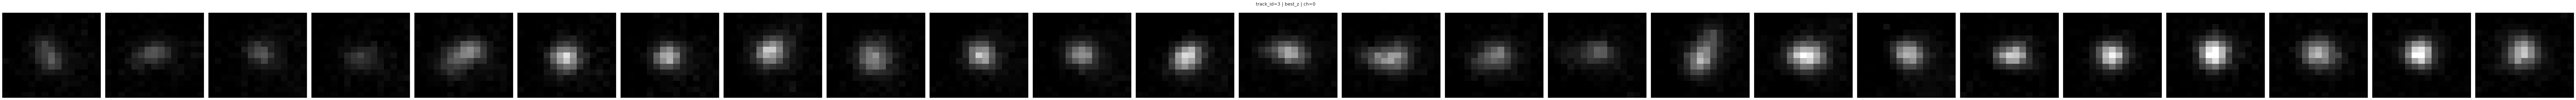

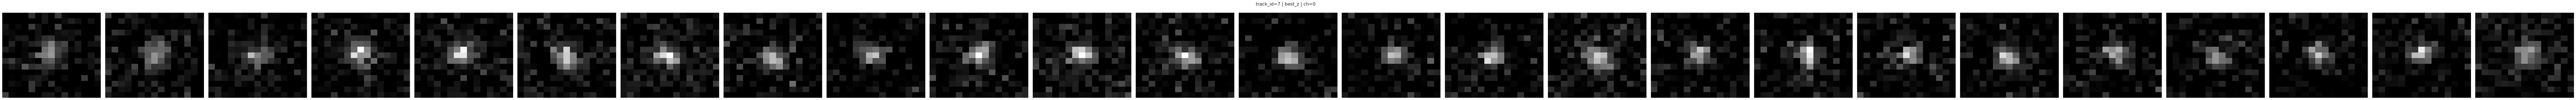

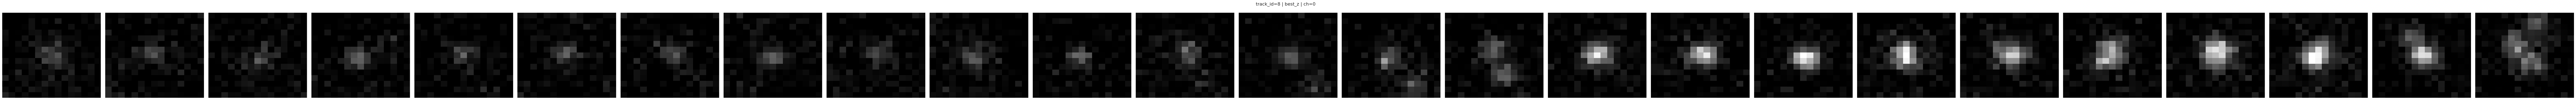

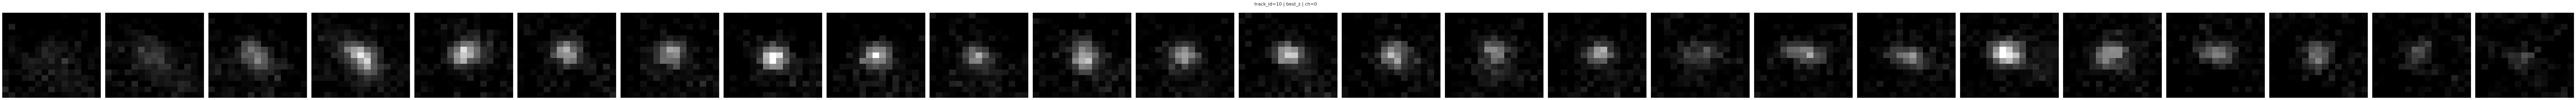

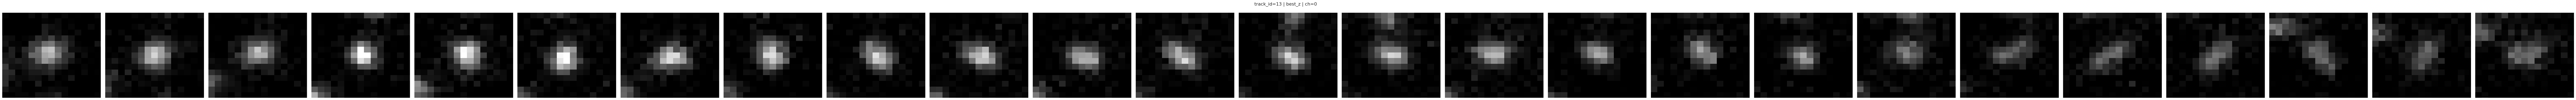

In [58]:
ta3.tplot.plot_trackarray_crops(fov=0, track_id=[3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

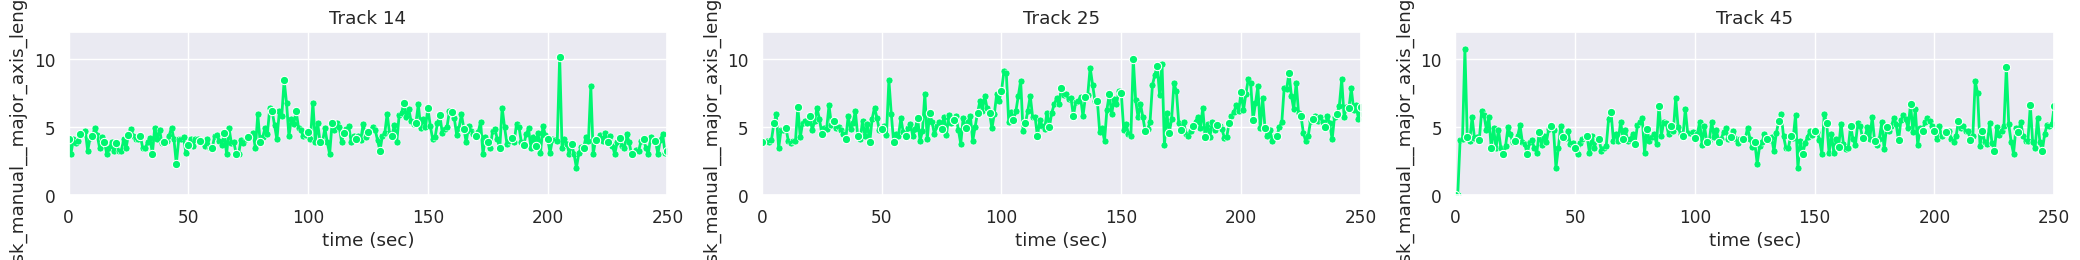

In [ ]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[14,25,45],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

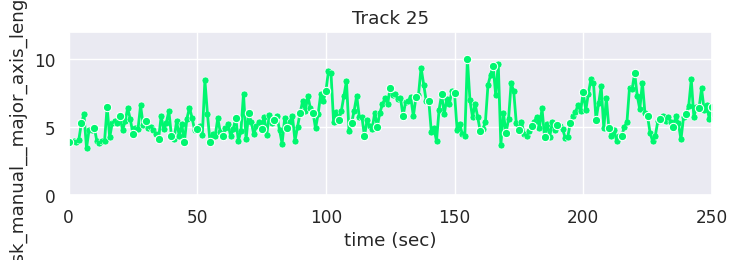

In [115]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

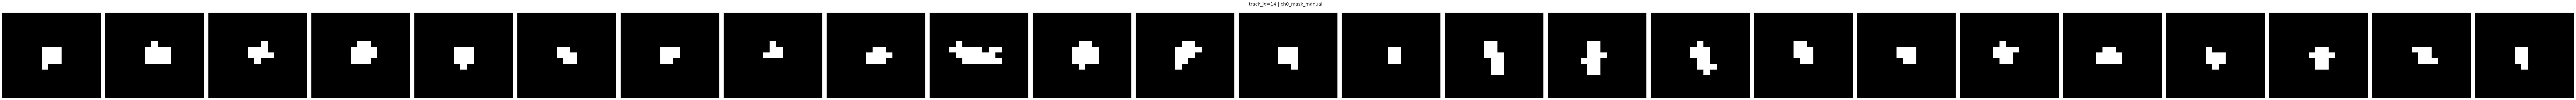

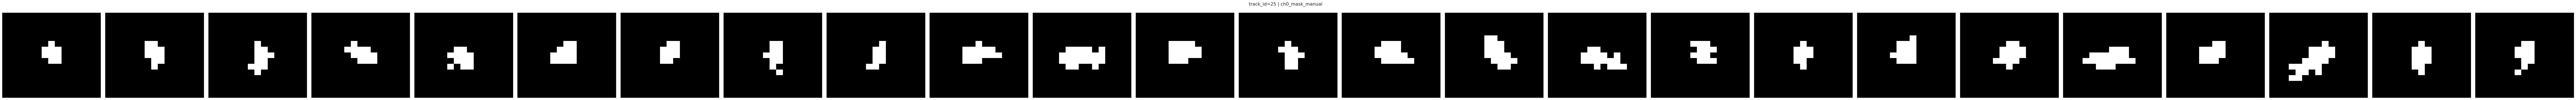

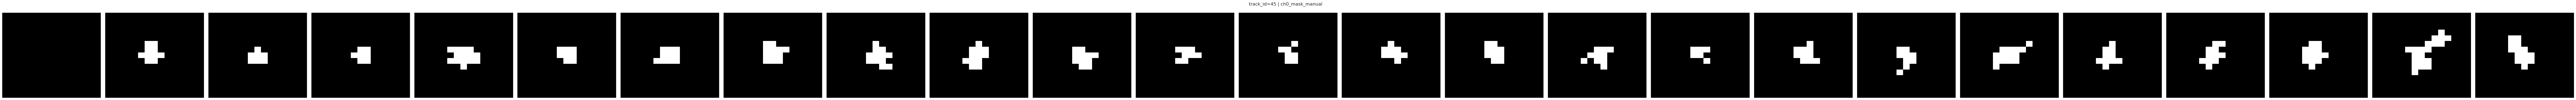

In [60]:
ta2.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

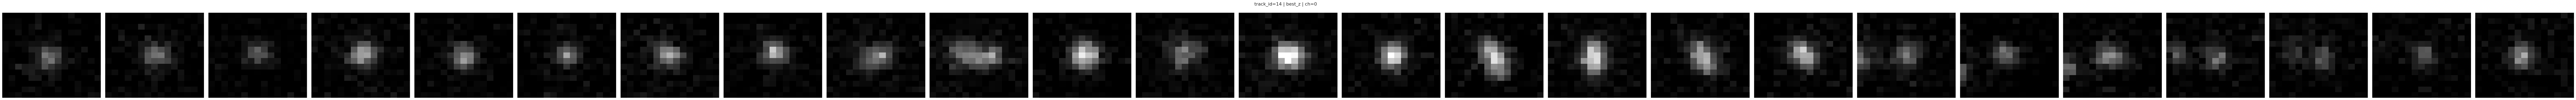

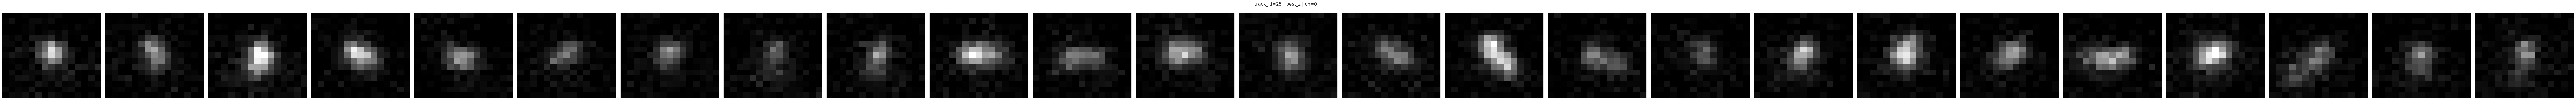

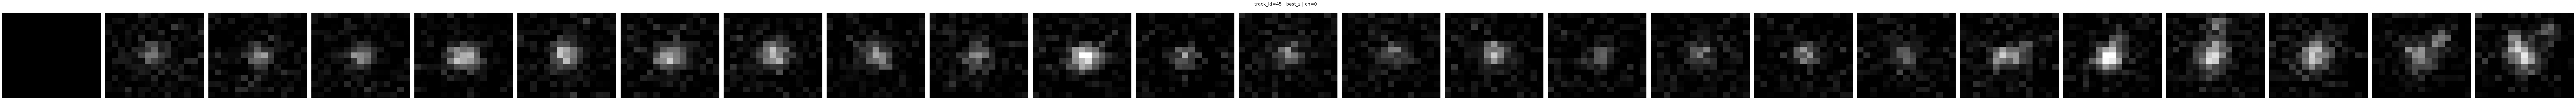

In [61]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

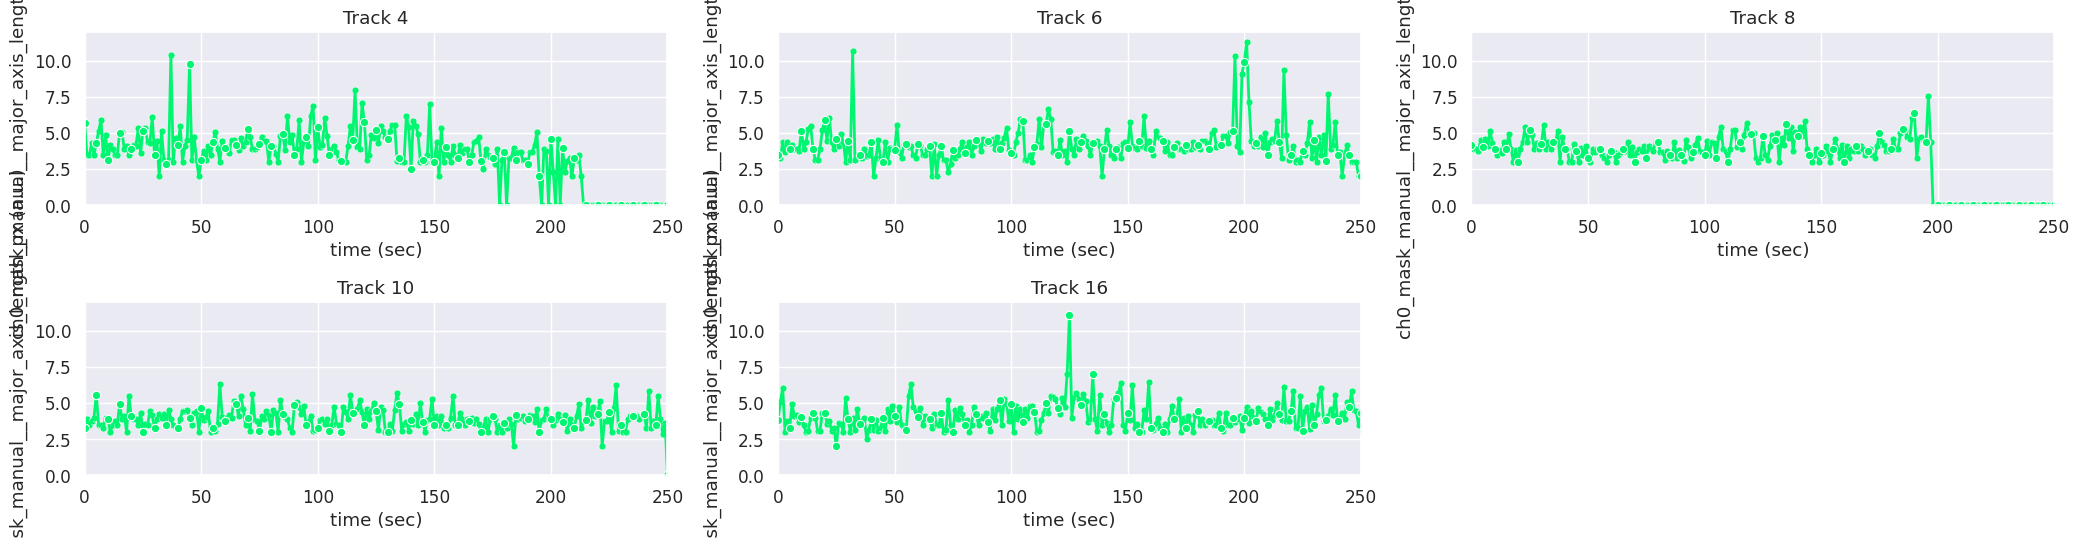

In [111]:
ta1.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[4,6,8,10,16],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

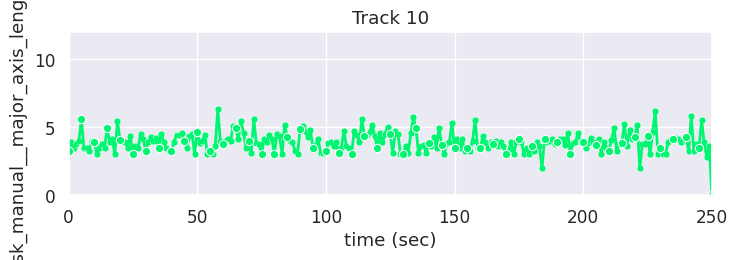

In [116]:
ta1.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[10],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

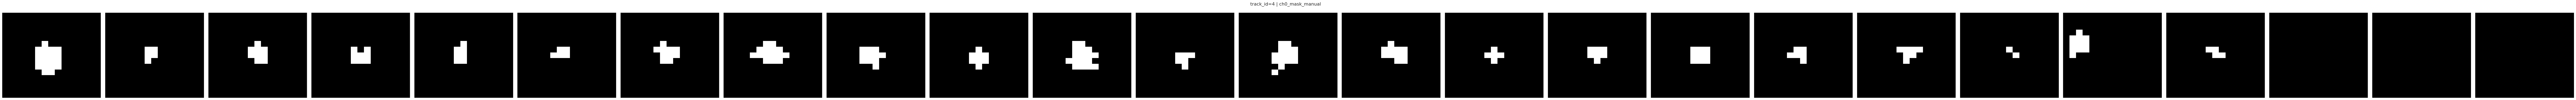

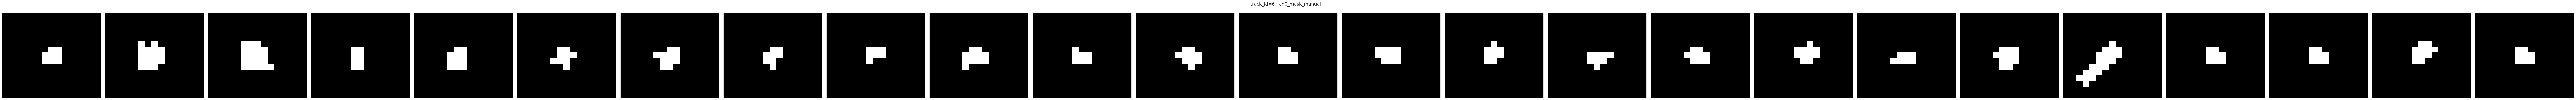

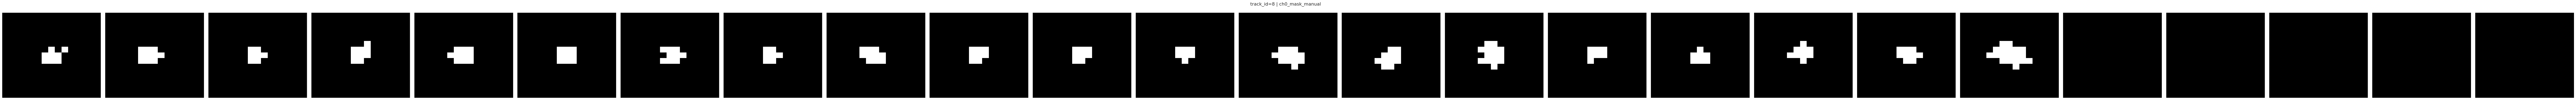

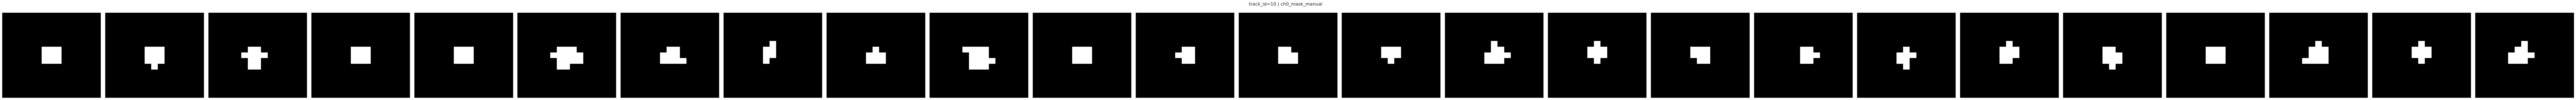

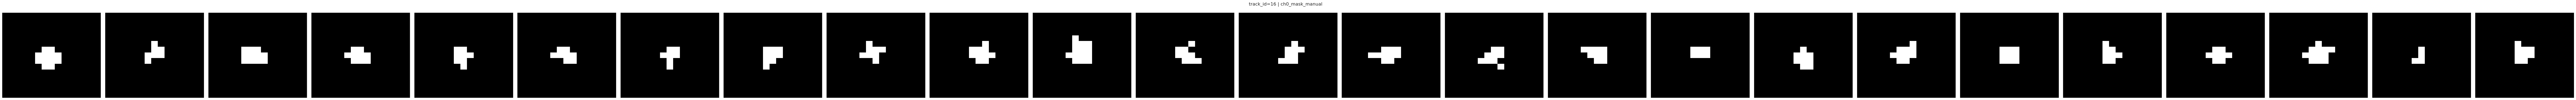

In [117]:
ta1.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[4,6,8,10,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

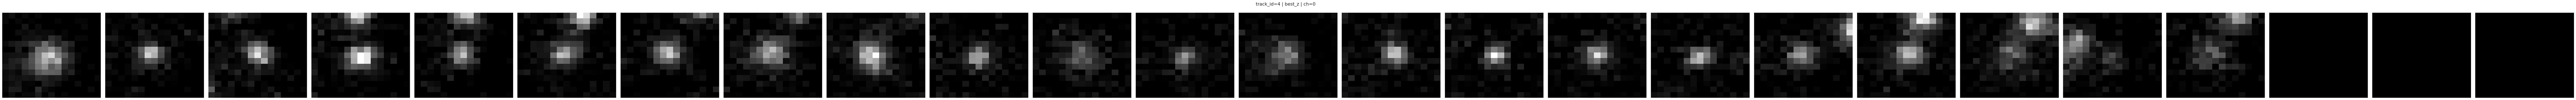

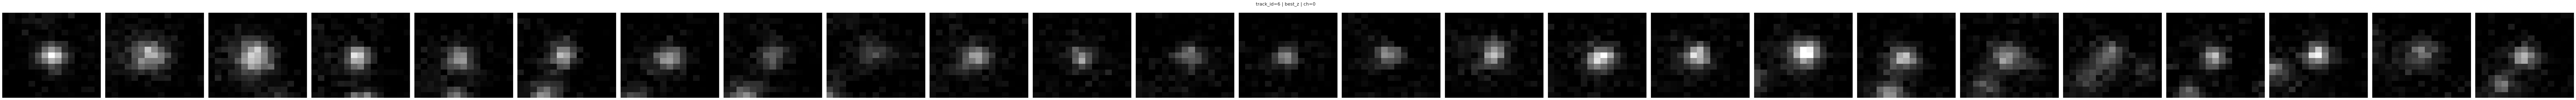

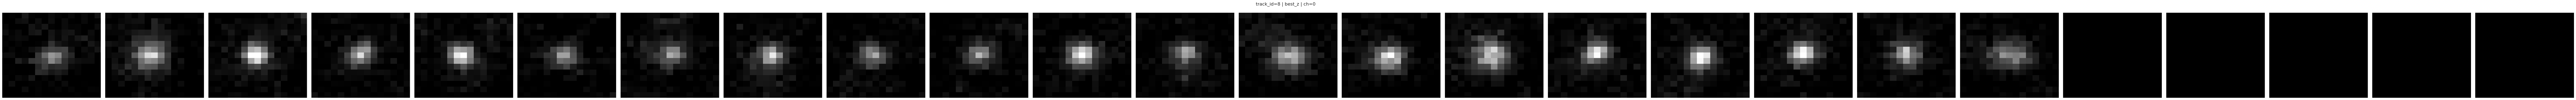

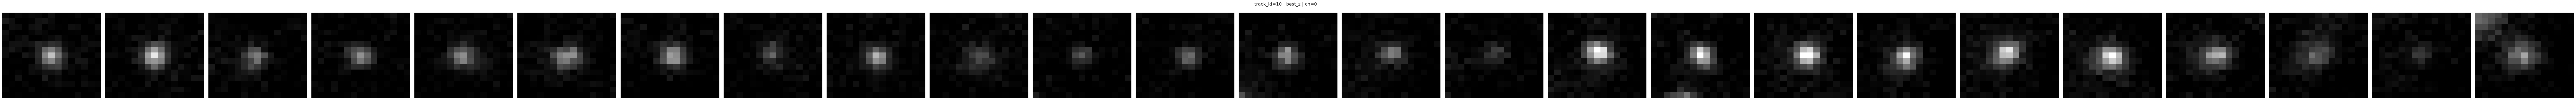

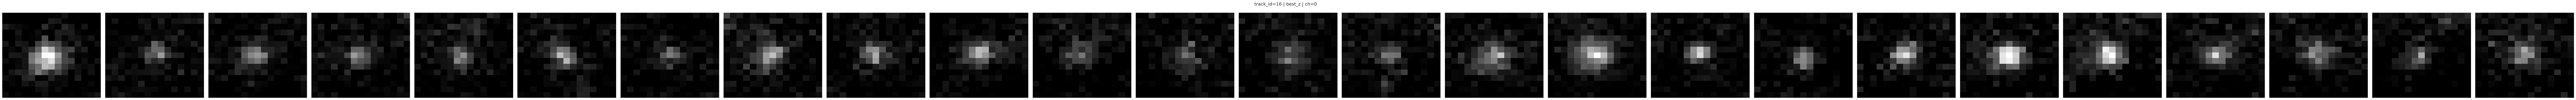

In [104]:
ta1.tplot.plot_trackarray_crops(fov=0, track_id=[4,6,8,10,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

In [15]:
import napari
viewer = napari.Viewer()
temp = ca.tools.montage(ta3, row = 'track_id', col = 'track_id').best_z
temp_ch0 = ca.tools.montage(ta3, row = 'track_id', col = 'track_id').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x7ac694045c00>